<a href="https://colab.research.google.com/github/RenataKostolina/Machine_learning/blob/main/salary_prediction_grad_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 1 (GradientBoostingClassifier)


#  Подготовка

In [ ]:
!gdown 1t_juvoRgEu_chZa9eSuyukL-6vrusSbz # test dataset
!gdown 1QcZ0ANp1qKf4TEpRNXZabNSVCGCIqNdP # train dataset

Downloading...
From: https://drive.google.com/uc?id=1t_juvoRgEu_chZa9eSuyukL-6vrusSbz
To: /content/adult.test
100% 2.00M/2.00M [00:00<00:00, 36.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QcZ0ANp1qKf4TEpRNXZabNSVCGCIqNdP
To: /content/adult.data
100% 3.97M/3.97M [00:00<00:00, 62.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education num",
    "marital status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital gain",
    "capital loss",
    "hours per week",
    "country",
    "salary"
]

In [ ]:
country = {
    3: [' Dominican-Republic', ' Columbia', ' Guatemala', ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Holand-Netherlands'],
    8: [' Peru', ' Vietnam', ' Honduras', ' El-Salvador', ' Haiti'],
    12: [' Trinadad&Tobago', ' Puerto-Rico', ' Portugal', ' Laos', ' Jamaica', ' Ecuador'],
    20: [' Thailand', ' South', ' Poland', ' Ireland'],
    25: [' Hungary', ' United-States', ' Scotland', ' ?'],
    28: [' Cuba', ' China', ' Greece', ' Hong', ' Philippines'],
    33: [' Germany', ' Canada', ' England', ' Italy'],
    38: [' Cambodia', ' Yugoslavia', ' Japan', ' Taiwan'],
    41: [' India', ' France', ' Iran']
}

In [ ]:
workclass = {
    0: [' Without-pay', ' Never-worked'],
    10: [' ?'],
    21: [' Private'],
    28: [' Self-emp-not-inc', ' State-gov', ' Local-gov'],
    38: [' Federal-gov'],
    55: [' Self-emp-inc']
}

In [ ]:
education = {
    0: [' Preschool'],
    5: [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th'],
    15: [' HS-grad'],
    19: [' Some-college'],
    25: [' Assoc-voc', ' Assoc-acdm'],
    41: [' Bachelors'],
    56: [' Masters'],
    74: [' Prof-school', ' Doctorate'],
}

In [ ]:
marital = {
    5: [' Never-married', ' Separated'],
    8: [' Married-spouse-absent', ' Widowed'],
    10: [' Divorced'],
    44: [' Married-AF-spouse', ' Married-civ-spouse']
}

In [ ]:
relationship = {
    2: [' Own-child', ' Other-relative'],
    8: [' Unmarried', ' Not-in-family'],
    46: [' Husband', ' Wife']
}

In [ ]:
occupation = {
    0: [' Priv-house-serv'],
    5: [' Other-service', ' Handlers-cleaners'],
    12: [ ' ?', ' Armed-Forces', ' Farming-fishing', ' Machine-op-inspct', ' Adm-clerical'],
    23: [' Transport-moving', ' Craft-repair', ' Sales'],
    31: [' Tech-support', ' Protective-serv'],
    46: [' Prof-specialty', ' Exec-managerial']
}

# data

In [ ]:
data = pd.read_csv("/content/adult.data", names=data_columns)

In [ ]:
data.drop(columns=['fnlwgt', 'education num'], inplace=True)

In [ ]:
for key in country.keys():
  data['country'] = data['country'].replace(country[key], key)

In [ ]:
for key in workclass.keys():
  data['workclass'] = data['workclass'].replace(workclass[key], key)

In [ ]:
for key in education.keys():
  data['education'] = data['education'].replace(education[key], key)

In [ ]:
for key in marital.keys():
  data['marital status'] = data['marital status'].replace(marital[key], key)

In [ ]:
for key in relationship.keys():
  data['relationship'] = data['relationship'].replace(relationship[key], key)

In [ ]:
for key in occupation.keys():
  data['occupation'] = data['occupation'].replace(occupation[key], key)

In [ ]:
data.loc[data['sex'] == ' Male', 'sex'] = 1
data.loc[data['sex'] == ' Female', 'sex'] = 0

In [ ]:
data.loc[data['salary'] == ' <=50K', 'salary'] = 0
data.loc[data['salary'] == ' >50K', 'salary'] = 1

# test

In [ ]:
test = pd.read_csv("/content/adult.test", names=data_columns, skiprows=1)

In [ ]:
test.drop(columns=['fnlwgt', 'education num'], inplace=True)

In [ ]:
for key in country.keys():
  test['country'] = test['country'].replace(country[key], key)

In [ ]:
for key in workclass.keys():
  test['workclass'] = test['workclass'].replace(workclass[key], key)

In [ ]:
for key in education.keys():
  test['education'] = test['education'].replace(education[key], key)

In [ ]:
for key in marital.keys():
  test['marital status'] = test['marital status'].replace(marital[key], key)

In [ ]:
for key in relationship.keys():
  test['relationship'] = test['relationship'].replace(relationship[key], key)

In [ ]:
for key in occupation.keys():
  test['occupation'] = test['occupation'].replace(occupation[key], key)

In [ ]:
test.loc[test['sex'] == ' Male', 'sex'] = 0
test.loc[test['sex'] == ' Female', 'sex'] = 1

In [ ]:
test.loc[test['salary'] == ' <=50K.', 'salary'] = 0
test.loc[test['salary'] == ' >50K.', 'salary'] = 1

# OHE

In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'marital status', 'occupation',
       'relationship', 'race', 'sex', 'capital gain', 'capital loss',
       'hours per week', 'country', 'salary'],
      dtype='object')

In [ ]:
categorical_columns = ['race', 'sex']

In [ ]:
categorical_features = data[categorical_columns]

In [ ]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['race', 'sex']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

In [ ]:
one_hot_encoded = encoder.fit_transform(test[unprocessed_cat_features])
one_hot_test = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=test.index)

In [ ]:
data_encoded = pd.concat([data, one_hot_data], axis=1)
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

In [ ]:
test_encoded = pd.concat([test, one_hot_test], axis=1)
test_encoded = test_encoded.drop(unprocessed_cat_features, axis=1)

In [ ]:
list_1 = list(data_encoded.columns)
list_2 = list(test_encoded.columns)
diff = list(set(list_1).difference(list_2))

In [ ]:
for i in diff:
  test_encoded[i] = 0

In [ ]:
data_encoded = data_encoded.reindex(sorted(data_encoded.columns), axis=1)
test_encoded = test_encoded.reindex(sorted(test_encoded.columns), axis=1)

In [ ]:
X = data_encoded.drop(columns=['salary'])
y = data_encoded['salary'].astype(int)

# Обучение моделей

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_final_test = test_encoded.drop(columns=['salary'])
y_final_test = test_encoded['salary'].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

## GradientBoostingClassifier

In [ ]:
"""model = GradientBoostingClassifier(random_state=42, n_estimators=113, min_samples_leaf=8, max_depth=6)

param_grid = {
    #'loss':['log_loss', 'exponential'],
    #'learning_rate':np.arange(0,1,0.1),
    #'subsample':np.arange(0, 3),
    #'criterion': ['friedman_mse', 'squared_error'],
    #'max_depth': np.arange(3,8),
    #'min_samples_split': np.arange(1, 10),
    #'min_samples_leaf':  np.arange(1, 10),
    #'n_estimators': np.arange(100, 120)
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))
gridsearch.fit(X_train, y_train)
# выведем наилучшие параметры
print(gridsearch.best_params_)"""

"model = GradientBoostingClassifier(random_state=42, n_estimators=113, min_samples_leaf=8, max_depth=6)\n\nparam_grid = {\n    #'loss':['log_loss', 'exponential'],\n    #'learning_rate':np.arange(0,1,0.1),\n    #'subsample':np.arange(0, 3),\n    #'criterion': ['friedman_mse', 'squared_error'],\n    #'max_depth': np.arange(3,8),\n    #'min_samples_split': np.arange(1, 10),\n    #'min_samples_leaf':  np.arange(1, 10),\n    #'n_estimators': np.arange(100, 120)\n}\n\ngridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))\ngridsearch.fit(X_train, y_train)\n# выведем наилучшие параметры\nprint(gridsearch.best_params_)"

In [ ]:
grad_boost = GradientBoostingClassifier(random_state=42, loss='exponential', learning_rate=0.7, max_depth=6, n_estimators=145)
grad_boost.fit(X_train, y_train)
y_grad_boost = grad_boost.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_grad_boost)
print("GradientBoostingClassifier ROC-AUC score on validation dataset: %.4f" % roc_auc)

GradientBoostingClassifier ROC-AUC score on validation dataset: 0.9102


In [ ]:
grad_boost = GradientBoostingClassifier(random_state=42, loss='exponential', learning_rate=0.7, max_depth=6, n_estimators=145)
grad_boost.fit(X, y)
y_grad_boost_test = grad_boost.predict_proba(X_final_test)[:, 1]
roc_auc = roc_auc_score(y_final_test, y_grad_boost_test)
print("GradientBoostingClassifier ROC-AUC score on test dataset: %.4f" % roc_auc)

GradientBoostingClassifier ROC-AUC score on test dataset: 0.8975


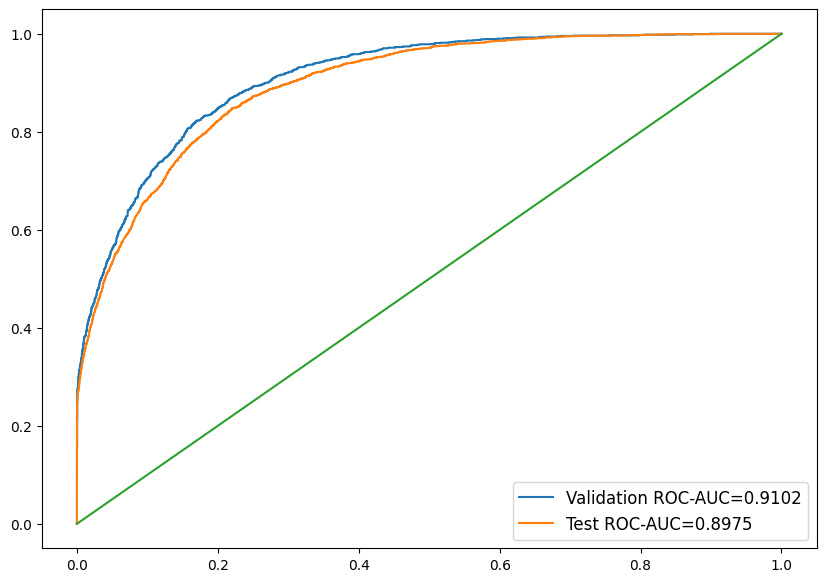

In [ ]:
val_auc = roc_auc_score(y_test, y_grad_boost)
test_auc = roc_auc_score(y_final_test, y_grad_boost_test)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_test, y_grad_boost)[:2], label='Validation ROC-AUC={:.4f}'.format(val_auc))
plt.plot(*roc_curve(y_final_test, y_grad_boost_test)[:2], label='Test ROC-AUC={:.4f}'.format(test_auc))
plt.legend(fontsize='large').get_frame()
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200))
plt.show()